##### Importing necessary libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Imputing the data

In [3]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [7]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Sepal Length, Sepal Width,Petal Length,Petal Width : Features
#### Species: Class Label or target variable

In [8]:
df.shape

(150, 5)

In [39]:
df.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

#### dataset have 150 rows and 5 columns 

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### 50 samples are of Iris-setosa
#### 50 samples are of Iris-versicolor
#### 50 samples are of Iris-Virginica


## 1.Finding the relationship between two variables:2-D Scatter plot

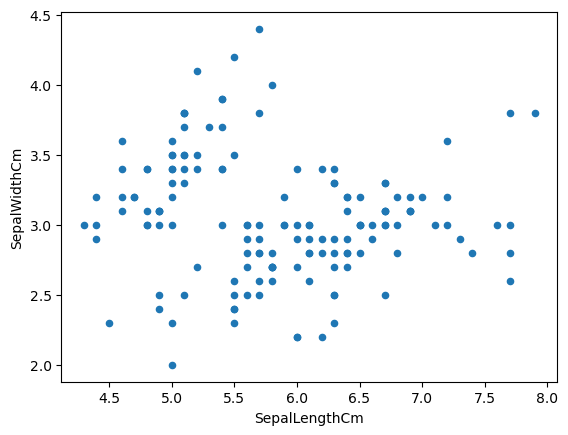

In [12]:
df.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()

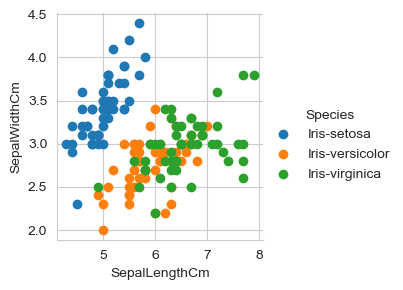

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

#### Observations:
            -- Using SepalLengthCm and SepalWidthCm features we can easily distinguish the setosa flowers from 
                others
            -- But seperating versicolor and virginica flowers is difficult, because there is considerable overlap 
                between each other

## 2.Distinguishing the relationship between all features/variables in the dataset : 3-D scatter plot = pairplot

/Users/punithreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


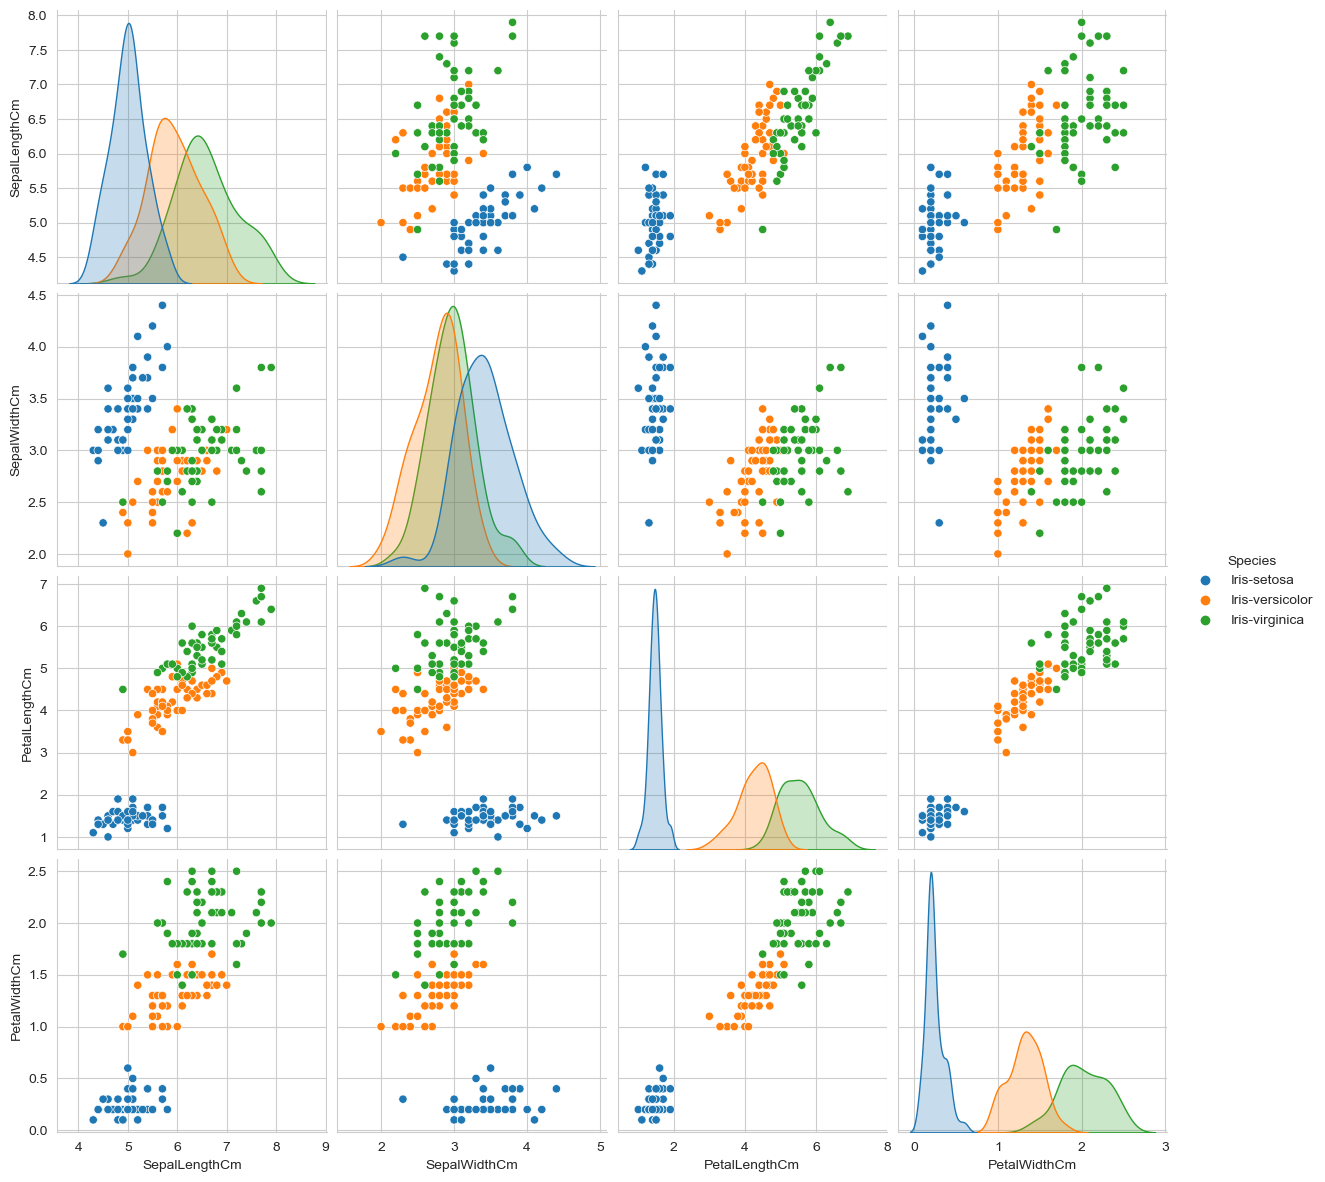

In [20]:
plt.close()
sns.pairplot(df,hue='Species',size=3)
plt.show()

#### Observations:
            - Amongst all the other relationships, we can easily distinguish the flowers;setosa,versicolor and 
                viginica with the features "PetalLengthCm and PetalWidthCm".
            - Because there is less overlap between the flowers

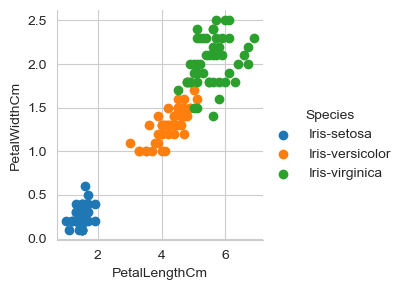

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

### Importing skicit learn models;metrics,KNeighborsClassifier,LogisticRegression,train_test_split

In [31]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Dropping the target variable

In [29]:
X = df.drop([ 'Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


#### Logistic Regression model with it's Accuracy

In [38]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print('Accuracy of the Logistic Regression model :',metrics.accuracy_score(y, y_pred))

Accuracy of the Logistic Regression model : 0.9733333333333334


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


## 3.Choosing KNN to Model Iris Species Prediction with k = 12

After seeing that a value of k = 12 is a pretty good number of neighbors for this model, 
I used it to fit the model for the entire dataset instead of just the training set.

In [36]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[2, 4, 8, 2]])

/Users/punithreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/punithreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Iris-virginica'], dtype=object)

## Prediction:
                - We have successfully predicted the flowers based on the measurements